In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#載入資料
data = pd.read_csv('customer behavior.csv')

In [3]:
#查看data
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


# 1.資料預處理

In [4]:
#顯示資料集data的資訊，並發現欄位Satisfaction Level有兩個缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [5]:
#查看欄位Satisfaction Level裡各個類別分別為多少
data['Satisfaction Level'].value_counts()

Satisfied      125
Unsatisfied    116
Neutral        107
Name: Satisfaction Level, dtype: int64

In [6]:
print('顧客滿意的比例為', round(125*100/348, 2), '%')
print('顧客不滿意的比例為', round(116*100/348, 2), '%')
print('顧客覺得中立的比例為', round(107*100/348, 2), '%')

顧客滿意的比例為 35.92 %
顧客不滿意的比例為 33.33 %
顧客覺得中立的比例為 30.75 %


以上計算後發現，滿意、不滿意、中立的比例差不多

以下使用找尋相同評分(Average Rating)的滿意程度用來補缺失值

In [7]:
#找出缺失值在哪幾列
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


以上欄位Satisfaction Level的缺失值分別在第7row及第143row

In [8]:
#找出當Average Rating為3.1分時，Satisfaction Level為多少
satisfied_count_rating_3_1 = data[data['Average Rating'] == 3.1]['Satisfaction Level'].value_counts()
satisfied_count_rating_3_1

Neutral    16
Name: Satisfaction Level, dtype: int64

從以上可看出當Average Rating為3.1分時，滿意程度都為Neutral

In [9]:
#找出當Average Rating為3.4分時，Satisfaction Level為多少
satisfied_count_rating_3_4 = data[data['Average Rating'] == 3.4]['Satisfaction Level'].value_counts()
satisfied_count_rating_3_4 

Neutral        17
Unsatisfied     1
Name: Satisfaction Level, dtype: int64

從以上可看出當Average Rating為3.4分時，滿意程度幾乎都為Neutral，只有一個是Unsatisfied 

In [10]:
#使用Neutral補缺失值
data['Satisfaction Level'] = data['Satisfaction Level'].fillna('Neutral')

In [11]:
#Satisfaction Level的缺失值補滿了
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        350 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [12]:
#各個欄位的敘述統計
data.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


# 2.資料視覺化

<Axes: xlabel='Age', ylabel='count'>

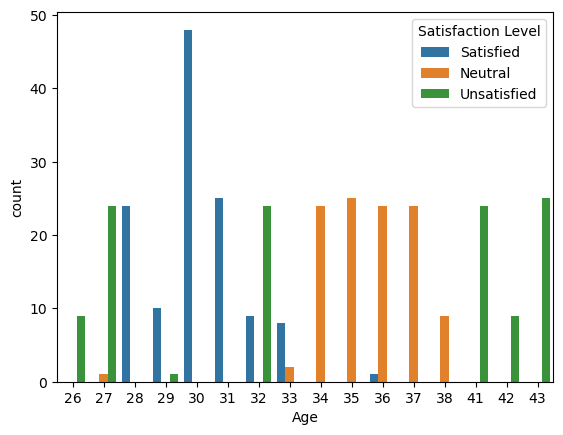

In [13]:
#各年齡的滿意度數量
sns.countplot(x=data['Age'], hue=data['Satisfaction Level'])

顯示出26,27歲及41~43的滿意度不好

(-1.099999017100354, 1.0999993716697465, -1.09999788815848, 1.0999998534340623)

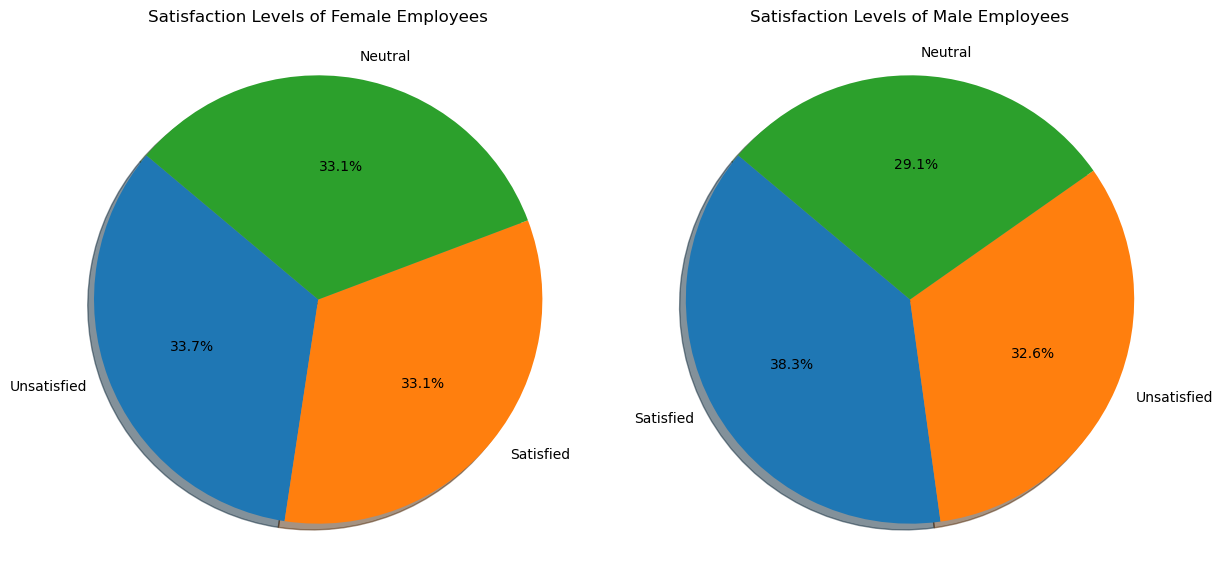

In [14]:
#男女的滿意程度
female_data = data[data['Gender'] == 'Female']
f_satisfaction_count = female_data['Satisfaction Level'].value_counts() #計算female各滿意度的數量
f_satisfaction_percentages = f_satisfaction_count / f_satisfaction_count.sum() * 100

male_data = data[data['Gender'] == 'Male']
m_satisfaction_count = male_data['Satisfaction Level'].value_counts() #計算male各滿意度的數量
m_satisfaction_percentages = m_satisfaction_count / m_satisfaction_count.sum() * 100 #計算各類別的百分比

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].pie(f_satisfaction_percentages, labels=f_satisfaction_percentages.index, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].set_title('Satisfaction Levels of Female Employees')
axs[0].axis('equal')

axs[1].pie(m_satisfaction_percentages, labels=m_satisfaction_percentages.index, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].set_title('Satisfaction Levels of Male Employees')
axs[1].axis('equal')

顯示出男性的滿意程度較女性高

<Axes: xlabel='Discount Applied', ylabel='count'>

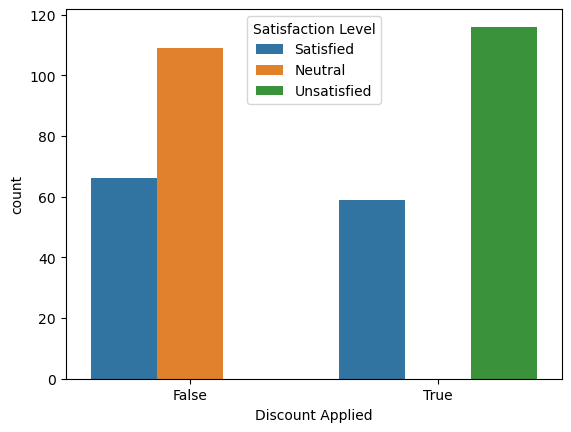

In [15]:
#使用優惠的滿意度
sns.countplot(x=data['Discount Applied'], hue=data['Satisfaction Level'])

顯示出有使用優惠的滿意度較不好

<Axes: xlabel='City', ylabel='count'>

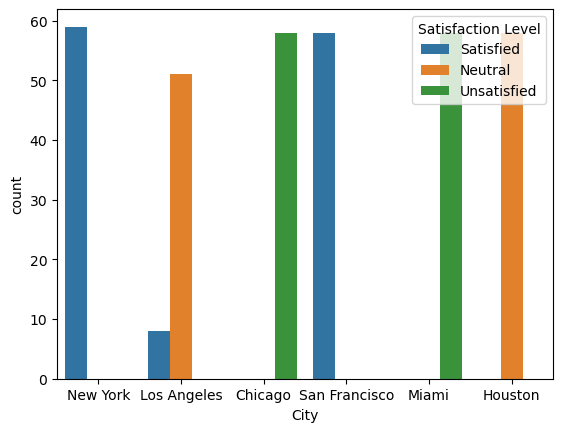

In [16]:
#城市的滿意度
sns.countplot(x=data['City'], hue=data['Satisfaction Level'])

顯示出Chicago及Miami的滿意度較其他城市來的低

# 使用獨熱編碼將類別型資料轉成數值型資料

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_feature = encoder.fit_transform(data[['Gender', 'City', 'Membership Type', 'Discount Applied', 'Satisfaction Level']])

/Users/serene0215/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
#取得特徵名稱
encoded_feature_names = encoder.get_feature_names_out(['Gender', 'City', 'Membership Type', 'Discount Applied', 'Satisfaction Level'])

In [19]:
#使用DataFrame將轉換後的資料和特徵結合
encoded_data = pd.DataFrame(encoded_feature, columns=encoded_feature_names)
encoded_data.head(2)

,Gender_Female,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Discount Applied_False,Discount Applied_True,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [20]:
#將進行完獨熱編碼的資料合併原資料集
data2 = pd.concat([data.drop(['Gender', 'City', 'Membership Type', 'Discount Applied', 'Satisfaction Level'], axis=1), encoded_data], axis=1)
data2.head(2)

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Female,Gender_Male,City_Chicago,City_Houston,...,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Discount Applied_False,Discount Applied_True,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
0,101,29,1120.2,14,4.6,25,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,102,34,780.5,11,4.1,18,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


# 數值型資料標準化

In [21]:
#將原是數值型資料進行標準化
from sklearn.preprocessing import StandardScaler
standard =  StandardScaler()
data2[['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']] = standard.fit_transform(data2[['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']])

因Customer ID為識別不同的客戶，不助於模型學習，故不將Customer ID進行標準化

In [22]:
data2.head()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Female,Gender_Male,City_Chicago,City_Houston,...,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Discount Applied_False,Discount Applied_True,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
0,101,-0.945152,0.760130,0.337346,1.001981,-0.118359,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,102,0.082826,-0.179459,-0.385538,0.139479,-0.639907,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,103,1.933185,-0.925570,-0.867461,-1.068024,1.148256,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,104,-0.739557,1.756144,1.542153,1.174482,-1.086947,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,105,-1.356343,-0.345692,0.096385,-0.033022,2.116844,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# 隨機森林

因Customer ID沒進行標準化(只為識別客戶)，故先將Customer ID刪除，以防影響後續模型訓練

In [23]:
data2 = data2.drop(['Customer ID'], axis=1)
data2

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Female,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,...,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Discount Applied_False,Discount Applied_True,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
0,-0.945152,0.760130,0.337346,1.001981,-0.118359,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.082826,-0.179459,-0.385538,0.139479,-0.639907,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1.933185,-0.925570,-0.867461,-1.068024,1.148256,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.739557,1.756144,1.542153,1.174482,-1.086947,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.356343,-0.345692,0.096385,-0.033022,2.116844,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,-0.328365,-0.511924,-0.626500,-0.378022,1.148256,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
346,0.494017,-1.036899,-1.108422,-1.758026,0.030654,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
347,-0.739557,0.955405,0.819269,0.829481,0.105161,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
348,0.082826,-0.180289,-0.385538,0.311979,-0.416386,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [33]:
#將資料分成Ｘ(預測變數)和y(被預測變數)
X = data2.drop(['Satisfaction Level_Satisfied', 'Satisfaction Level_Neutral', 'Satisfaction Level_Unsatisfied'], axis=1)
y = data2[['Satisfaction Level_Satisfied', 'Satisfaction Level_Neutral', 'Satisfaction Level_Unsatisfied']]
y = y.idxmax(axis=1).map({'Satisfaction Level_Satisfied': 0, 'Satisfaction Level_Neutral': 1, 'Satisfaction Level_Unsatisfied': 2}) #將目標變量轉換成單列類別標籤
y

0      0
1      1
2      2
3      0
4      2
      ..
345    2
346    1
347    0
348    1
349    2
Length: 350, dtype: int64

In [34]:
#切分訓練集為0.7,測試集為0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [35]:
print("原始數據類別分布:", Counter(y_train))

原始數據類別分布: Counter({0: 87, 2: 81, 1: 77})


因切分後的訓練集筆數為245，故以下使用SMOTE方法，生成新的合成樣本增加樣本數量。

In [36]:
import warnings
warnings.simplefilter("ignore", UserWarning)

smote = SMOTE(sampling_strategy={0: 77*50, 1: 87*50, 2: 81*50}, random_state=0)
X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train)
print("過採樣後的數據類別分佈:", Counter(y_train_smo))

過採樣後的數據類別分佈: Counter({1: 4350, 2: 4050, 0: 3850})


增加後的總筆數為12250筆

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'n_estimators': [100, 300, 500]
}
rfc = RandomForestClassifier(random_state=0)
gs = GridSearchCV(rfc, param_grid=param_grid, cv=10)
gs.fit(X_train_smo, y_train_smo.values.ravel())
print('最佳參數為：', gs.best_params_)
print('訓練集的預測結果：', gs.best_score_)
print('測試集的預測結果：', gs.best_estimator_.score(X_train_smo, y_train_smo.values.ravel()))

最佳參數為： {'max_depth': 3, 'n_estimators': 300}
訓練集的預測結果： 1.0
測試集的預測結果： 1.0


In [38]:
#使用隨機森量模型
forest = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=300)

In [39]:
forest.fit(X_train_smo, y_train_smo)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=0)

In [40]:
y_pred = forest.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(pd.DataFrame(cm, index=['預測1', '預測2', '預測3'], columns=['實際1', '實際2', '實際3']))

     實際1  實際2  實際3
預測1   38    0    0
預測2    0   32    0
預測3    0    0   35
